# Алгоритмы машинного обучения на датасете Breast cancer

In [2]:
from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import export_graphviz
import matplotlib.pylab as plt

import numpy as np
import graphviz
%matplotlib inline

RAND = 42
random_state = RAND

from sklearn.model_selection import cross_val_score, KFold

In [3]:
cancer = load_breast_cancer()

In [4]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(cancer.target_names)

['malignant' 'benign']


In [6]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
type(cancer.data)

numpy.ndarray

In [8]:
cancer.data.shape

(569, 30)

# Метод k ближайших соседей

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)

Text(0.5, 1.0, 'Правильность при разбиении данных на тестовый и тренировочный наборы')

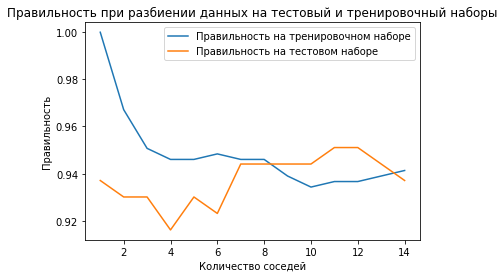

In [10]:
training_accuracy = []
test_accuracy = []

# попробуем запустить Метод ближайших соседей при различных значениях параметра k - кол-во ближайших соседей от 1 до 14
neighbors_setting = range(1,15) 

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))
    
plt.plot(neighbors_setting,training_accuracy, label = 'Правильность на тренировочном наборе')
plt.plot(neighbors_setting,test_accuracy, label = 'Правильность на тестовом наборе')
plt.ylabel('Правильность')
plt.xlabel('Количество соседей')
plt.legend()
plt.title('Правильность при разбиении данных на тестовый и тренировочный наборы')

In [11]:
# при k = 7,8 видно, что модель достигает наибольшей точности 

print ('Правильность на тренировочном наборе, при k = 8: {:.3f}'.format(training_accuracy[7]))
print ('Правильность на тестовом наборе, при k = 8: {:.3f}'.format(test_accuracy[7]))

Правильность на тренировочном наборе, при k = 8: 0.946
Правильность на тестовом наборе, при k = 8: 0.944


In [12]:
# проверим точность при k=4 (при которой остигается самая минимальная точность на графке)

print ('Правильность на тренировочном наборе, при k = 4: {:.3f}'.format(training_accuracy[3]))
print ('Правильность на тестовом наборе, при k = 4: {:.3f}'.format(test_accuracy[3]))

Правильность на тренировочном наборе, при k = 4: 0.946
Правильность на тестовом наборе, при k = 4: 0.916


In [14]:
# разбиваем данные на обучающий + проверочный набор и тестовый набор

X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = RAND)
print("Размер обучающего набора: {}\nразмер проверочного набора:"
      "{}\nразмер тестового набора: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Размер обучающего набора: 319
размер проверочного набора:107
размер тестового набора: 143



### Кросс - валидация

Text(0.5, 1.0, 'Правильность при разбиении данных на обучающий, проверочный и тестовый наборы')

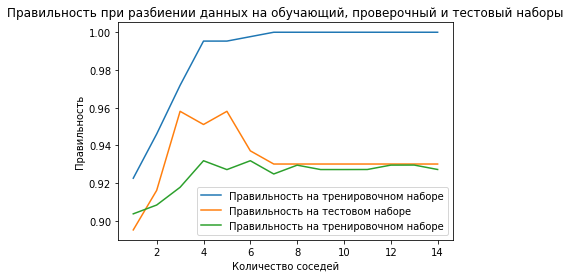

In [223]:
# ищем параметр k через график при перекрестной проверке
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = []

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    scor = cross_val_score(knn,X_trainval, y_trainval, cv = kfold)
    scores.append(np.mean(scor))

plt.plot(neighbors_setting,training_accuracy, label = 'Правильность на тренировочном наборе')
plt.plot(neighbors_setting,test_accuracy, label = 'Правильность на тестовом наборе')    
plt.plot(neighbors_setting, scores, label = 'Правильность на тренировочном наборе')
plt.ylabel('Правильность')
plt.xlabel('Количество соседей')
plt.legend()  
plt.title('Правильность при разбиении данных на обучающий, проверочный и тестовый наборы')

In [16]:
# при k=4 достигается наибольшая правильность
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_trainval, y_trainval)
knn_test_score = knn.score(X_test,y_test)    
print("Правильность на тестовом наборе, при k = 4: {:.3f}".format(knn_test_score))    

Правильность на тестовом наборе, при k = 4: 0.916


In [17]:
# проверка правильности через разбиение данных на обучающий, проверочный, тестовый

X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = RAND)


best_score = 0

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,y_train)
    score = knn.score(X_valid,y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'n_neighbors': n_neighbors}

In [18]:
best_parameters

{'n_neighbors': 4}

In [19]:
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе

knn = KNeighborsClassifier(**best_parameters)
knn.fit(X_trainval, y_trainval)
test_score = knn.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))

Лучшее значение правильности на проверочном наборе: 0.972
Наилучшие значения параметров:  {'n_neighbors': 4}
Правильность на тестовом наборе с наилучшими параметрами: 0.916


### F1 мера, precision, recall

In [20]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import roc_auc_score

In [21]:
knn_pred = knn.predict(X_test)

print('f1 мера = {:.2f}'.format(f1_score(y_test,knn_pred)))
print ('Точность = {:.2f}'.format(precision_score(y_test,knn_pred)))
print ('Полнота = {:.2f}\n'.format(recall_score(y_test,knn_pred)))

f1 мера = 0.93
Точность = 0.94
Полнота = 0.92



### ROC - AUC

AUC для метода k ближайших соседей = 0.963


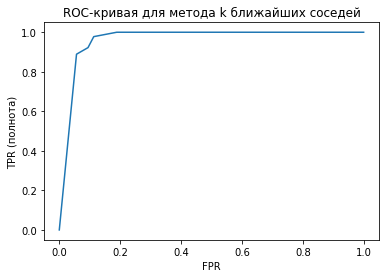

In [23]:
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr_knn, tpr_knn)
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.title('ROC-кривая для метода k ближайших соседей')


knn_auc = roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
print("AUC для метода k ближайших соседей = {:.3f}".format(knn_auc))

# Логистическая регрессия

In [24]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)


log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

print("Размер обучающего набора: {}\nразмер тестового набора: {}\n".format(X_train.shape[0], X_test.shape[0]))
print ('Правильность на тренировочном наборе: {:.3f}'.format(log_reg.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(log_reg.score(X_test,y_test)))

Размер обучающего набора: 426
размер тестового набора: 143

Правильность на тренировочном наборе: 0.953
Правильность на тестовом наборе: 0.958


In [25]:
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = RAND)
print("Размер обучающего набора: {}\nразмер проверочного набора: "
      "{}\nразмер тестового набора: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Размер обучающего набора: 319
размер проверочного набора:107
размер тестового набора: 143



In [26]:
log_reg.C

1.0

### Кросс - валидация

In [27]:
# По умолчанию параметр С, отвечающий за регуляризацию модели, низкий и равен 1. 
# Низкие значения параметра С задают МЕНЬШУЮ(?) регуляризацию модели.  #стр 73
# Попробуем изменить С парамет

C = [0.01, 1.0, 100]

kfold = KFold(n_splits=5, random_state=42, shuffle=True)


for c in C:
    log_reg = LogisticRegression(C=c)
    scor = cross_val_score(log_reg,X_trainval, y_trainval, cv = kfold)
    print('При C = {} правильность при перекрестной проверке = {:.3f}'.format(c,np.mean(scor)))

# Результат при перекрестной проверке чуть ниже    
    
# Значение по умолчанию C=1 обеспечивает неплохое качество модели,
# правильность при перекрестной проверке составляет 95%. 

# При увеличении С мы получили более сложную модель, которая дает более точные результаты. 
# Однако, нельзя утверждать, что модель не переобучена.

При C = 0.01 правильность при перекрестной проверке = 0.929
При C = 1.0 правильность при перекрестной проверке = 0.951
При C = 100 правильность при перекрестной проверке = 0.962


In [28]:
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = RAND)

C = [0.01, 1.0, 100]
best_score = 0

for c in C:
    log_reg = LogisticRegression(C=c)
    log_reg.fit(X_train,y_train)
    score = log_reg.score(X_valid,y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'C': c}

In [29]:
best_parameters 

{'C': 1.0}

In [30]:
# Обучим модель на лучшем параметре и проверим правильность на тестовом наборе

log_reg = LogisticRegression(**best_parameters)
log_reg.fit(X_trainval, y_trainval)
test_score = knn.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))
    
# правильность на тестовом наборе снизилась по сравнению с перекрестной проверкой

Лучшее значение правильности на проверочном наборе: 0.991
Наилучшие значения параметров:  {'C': 1.0}
Правильность на тестовом наборе с наилучшими параметрами: 0.916


### F1 мера, precision, recall

In [31]:
pred_logreg = log_reg.predict(X_test)
print('f1 мера = {:.2f}'.format(f1_score(y_test,pred_logreg)))
print ('Точность = {:.2f}'.format(precision_score(y_test,pred_logreg)))
print ('Полнота = {:.2f}\n'.format(recall_score(y_test,pred_logreg)))

# Почти все точки (99%), отнесенные к 1 классу, были определены моделью верно.

f1 мера = 0.97
Точность = 0.95
Полнота = 0.99



In [32]:
from sklearn.metrics import  classification_report

print(classification_report(y_test, pred_logreg))

# Из данных показателе можно сделать вывод, что модель хорошо работает на тестовых данных, 
# выделив общую закономерность и правильно относя точки к классам.

             precision    recall  f1-score   support

          0       0.98      0.91      0.94        53
          1       0.95      0.99      0.97        90

avg / total       0.96      0.96      0.96       143



### ROC - AUC

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.decision_function(X_test))

Text(0.5, 1.0, 'ROC-кривая для логистической регрессии')

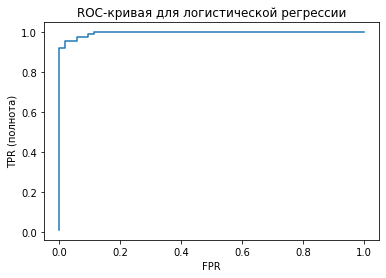

In [34]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.title('ROC-кривая для логистической регрессии')
# По кривой видно, что она стремится в левый верхний угол, что яв-ся признаком хорошего классификатора, 
# т.к. при полноте равной почти 0.9, кол-во ложно положительных примеров составляет 0.
# При полноте равной ~ 0.98, FPR < 0.1.

In [35]:
from sklearn.metrics import roc_auc_score
log_reg_auc = roc_auc_score(y_test,log_reg.decision_function(X_test))
print("AUC для логистической регрессии = {:.3f}".format(log_reg_auc))

AUC для логистической регрессии = 0.996


# Дерево решений

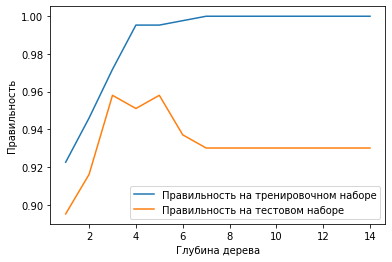

In [77]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = RAND)

training_accuracy = []
test_accuracy = []

# у деревьев мы можем регулировать их глубину. 
# Рассмотрим точность деревьев при глубине от 1 до 14
max_depth = range(1,15) 

for md in max_depth:
    tree = DecisionTreeClassifier(max_depth = md, random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train,y_train))
    test_accuracy.append(tree.score(X_test,y_test))
    
    
plt.plot(max_depth,training_accuracy, label = 'Правильность на тренировочном наборе')
plt.plot(max_depth,test_accuracy, label = 'Правильность на тестовом наборе')
plt.ylabel('Правильность')
plt.xlabel('Глубина дерева')
plt.legend()

При глубине дерева более 5 модель переобучается: на тренировочном наборе алгоритм предсказывает значения с высокой правильностью, 
но при этом правильность на тестовом наборе данных снижается.

На графике видно, что лучшая правильность на обоих наборах достигается при max_depth = 3.

In [78]:
# при max_depth = 3 видно, что модель достигает наибольшей точности 

print ('Правильность на тренировочном наборе, при max_depth = 3: {:.3f}'.format(training_accuracy[2]))
print ('Правильность на тестовом наборе, при max_depth = 3: {:.3f}'.format(test_accuracy[2]))

Правильность на тренировочном наборе, при max_depth = 3: 0.972
Правильность на тестовом наборе, при max_depth = 3: 0.958


### Кросс - валидация

In [72]:
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = RAND)

Text(0.5, 1.0, 'Правильность при перекрестной проверке')

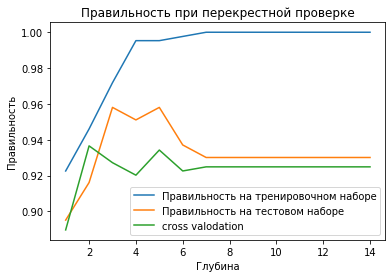

In [225]:
# ищем параметр max_depth через график при перекрестной проверке
kfold = KFold(n_splits=5, random_state=42, shuffle=True)
scores = []

for md in max_depth:
    tree = DecisionTreeClassifier(max_depth = md, random_state = RAND)
    scor = cross_val_score(tree,X_trainval, y_trainval, cv = kfold)
    scores.append(np.mean(scor))

plt.plot(max_depth,training_accuracy, label = 'Правильность на тренировочном наборе')
plt.plot(max_depth,test_accuracy, label = 'Правильность на тестовом наборе')    
plt.plot(max_depth, scores, label = 'cross valodation')
plt.ylabel('Правильность')
plt.xlabel('Глубина') 
plt.legend()
plt.title('Правильность при перекрестной проверке')

In [74]:
best_score = 0

for md in max_depth:
    tree = DecisionTreeClassifier(max_depth = md, random_state=0)
    tree.fit(X_train,y_train)
    score = tree.score(X_valid,y_valid)

    if score > best_score:
        best_score = score
        best_parameters = {'max_depth': md}

In [75]:
best_parameters

{'max_depth': 7}

In [76]:
tree = DecisionTreeClassifier(**best_parameters, random_state= RAND)
tree.fit(X_trainval,y_trainval)
test_score = tree.score(X_test,y_test)

print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))

Лучшее значение правильности на проверочном наборе: 0.981
Наилучшие значения параметров:  {'max_depth': 7}
Правильность на тестовом наборе с наилучшими параметрами: 0.923


In [ ]:
# правильность на проверочном наборе увеличилась, на тестовом снизилась

### F1, precision,recall

In [79]:
# показатели F-меры, точности и полноты на дереве с глубиной = 7 
pred_tree = tree.predict(X_test)

print('f1 мера = {:.2f}'.format(f1_score(y_test,pred_tree)))
print ('Точность = {:.2f}'.format(precision_score(y_test,pred_tree)))
print ('Полнота = {:.2f}\n'.format(recall_score(y_test,pred_tree)))
# показатели ниже, чем у логистической регрессии

f1 мера = 0.94
Точность = 0.96
Полнота = 0.92



In [80]:
print(classification_report(y_test, pred_tree))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91        54
          1       0.96      0.92      0.94        89

avg / total       0.93      0.93      0.93       143



### ROC - AUC

Text(0.5, 1.0, 'ROC-кривая для дерева решений')

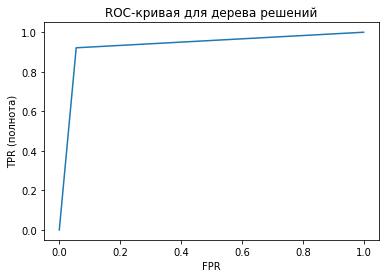

In [81]:
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree.predict_proba(X_test)[:,1])

plt.plot(fpr_tree, tpr_tree)
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.title('ROC-кривая для дерева решений')

In [82]:
tree_auc = roc_auc_score(y_test,tree.predict_proba(X_test)[:,1])
print("AUC для дерева решений = {:.3f}".format(tree_auc))

# ROC - AUC так же показывают, что на данном наборе данных логистическая регрессия работает лучше, чем дерево решений

AUC для дерева решений = 0.933


In [107]:
export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], 
                feature_names=cancer.feature_names, 
                impurity=False, filled=True)

In [108]:
print('Feature importances:\n {}'.format(tree.feature_importances_))
type(tree.feature_importances_)

Feature importances:
 [0.         0.         0.         0.         0.         0.
 0.         0.72468105 0.         0.         0.01277192 0.
 0.         0.         0.00826156 0.         0.         0.01702539
 0.         0.         0.05899273 0.12550655 0.00838371 0.03452044
 0.00985664 0.         0.         0.         0.         0.        ]


numpy.ndarray

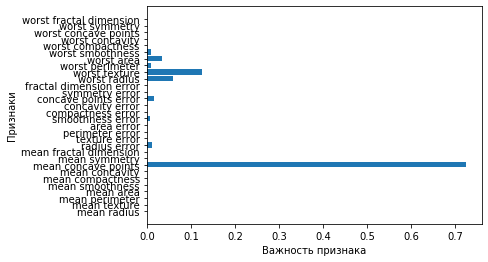

In [109]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature),tree.feature_importances_, align = 'center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.show()

# Случайный лес

In [86]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = RAND)

forest = RandomForestClassifier(n_estimators = 100, random_state = RAND)
forest.fit(X_train,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(forest.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(forest.score(X_test,y_test)))

# можно регулировать параметры max_depth и max_features

Правильность на тренировочном наборе: 1.000
Правильность на тестовом наборе: 0.965


In [87]:
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Кросс - валидация

In [106]:
# правильность при разном кол-ве деревьев - параметр n_estimators
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = RAND)

best_score = 0

for e in estimators:
    forest = RandomForestClassifier(n_estimators = e, random_state = RAND)
    forest.fit(X_train,y_train)
    forest.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'n_estimators': e}

In [107]:
best_parameters

{'n_estimators': 5}

In [108]:
# правильность при перекрестной проверке

kfold = KFold(n_splits=5, random_state=42, shuffle=True)
estimators = [5, 30, 55, 80, 100]
scores = []


for e in estimators:
    forest = RandomForestClassifier(n_estimators = e, random_state = RAND)
    scor = cross_val_score(forest,X_trainval, y_trainval, cv = kfold)
    scores.append(np.mean(scor))
    print('n_estimators = ', e)
    print("Правильность слайчайного леса при перекрестной проверке {:.3f}\n".format(np.mean(scor)))    

n_estimators =  5
Правильность слайчайного леса при перекрестной проверке 0.936

n_estimators =  30
Правильность слайчайного леса при перекрестной проверке 0.955

n_estimators =  55
Правильность слайчайного леса при перекрестной проверке 0.953

n_estimators =  80
Правильность слайчайного леса при перекрестной проверке 0.951

n_estimators =  100
Правильность слайчайного леса при перекрестной проверке 0.953



In [109]:
# правильность при условии, что выбрали параметр из разделения данных на 3 части
forest = RandomForestClassifier(**best_parameters, random_state= RAND)
forest.fit(X_trainval,y_trainval)
test_score = forest.score(X_test,y_test)

print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))
    

Лучшее значение правильности на проверочном наборе: 0.981
Наилучшие значения параметров:  {'n_estimators': 5}
Правильность на тестовом наборе с наилучшими параметрами: 0.937


In [112]:
# правильность при условии, что выбрали параметр из перекрестной проверки
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state = RAND)

forest = RandomForestClassifier(n_estimators= 30, random_state= RAND)
forest.fit(X_trainval,y_trainval)
test_score = forest.score(X_test,y_test)

print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров n_estimators: ", forest.n_estimators)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))

Лучшее значение правильности на проверочном наборе: 0.981
Наилучшие значения параметров n_estimators:  30
Правильность на тестовом наборе с наилучшими параметрами: 0.951


### F1, precision,recall

f1 мера = 0.96
Точность = 0.96
Полнота = 0.97

AUC для случайного леса = 0.994


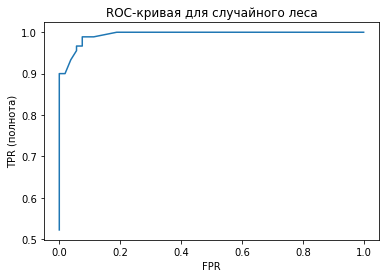

In [113]:
# показатели F-меры, точности и полноты на случайном лесе с параметрами n_estimators = 30
pred_rf = forest.predict(X_test)

print('f1 мера = {:.2f}'.format(f1_score(y_test,pred_rf)))
print ('Точность = {:.2f}'.format(precision_score(y_test,pred_rf)))
print ('Полнота = {:.2f}\n'.format(recall_score(y_test,pred_rf)))


# ROC - curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, forest.predict_proba(X_test)[:,1])

plt.plot(fpr_rf, tpr_rf)
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.title('ROC-кривая для случайного леса')

# AUC
forest_auc = roc_auc_score(y_test,forest.predict_proba(X_test)[:,1])
print("AUC для случайного леса = {:.3f}".format(forest_auc))

In [ ]:
# у случайного леса показатели значительно лучше, чем у дерева решений и хуже, чем у лог. регрессии 

### Анализ признаков 

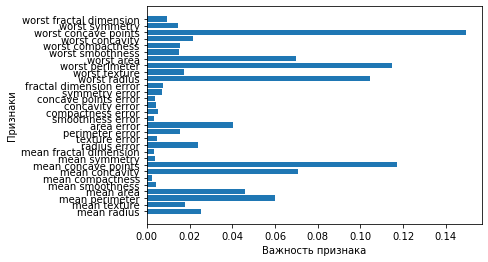

In [111]:
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature),forest.feature_importances_, align = 'center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.show()

Без настройки каких-либо параметров случайный лес дает нам правильность 97%, это лучше результата линейных моделей или
одиночного дерева решений. При регулировке параметров max_features и max_depth увидели, что модель работает лучше всего на заданных автоматически параметрах. 

# Нейронная сеть

In [172]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = RAND)

mlp = MLPClassifier(random_state = RAND)
mlp.fit(X_train,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(mlp.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(mlp.score(X_test,y_test)))

Правильность на тренировочном наборе: 0.890
Правильность на тестовом наборе: 0.923


Нейронные сети также требуют того, чтобы все входные признаки были измерены в одном и том же масштабе, в идеале они должны иметь среднее 0 и дисперсию 1. 

In [173]:
print('Максимум для каждого признака:\n {}'.format(cancer.data.max(axis = 0)))

Максимум для каждого признака:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [174]:
# попробуем отмасштабировать данные и сравнить результаты
scaler = StandardScaler()

X_train_scaled = scaler.fit(X_train).transform(X_train) # в исходном ноутбуке ошибка, Мюллер стр 153
X_test_scaled = scaler.fit(X_train).transform(X_test)

mlp = MLPClassifier(max_iter = 1000,random_state = RAND)
mlp.fit(X_train_scaled,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

# масштабирование данных помогло, результаты стали лучше

Правильность на тренировочном наборе: 0.995
Правильность на тестовом наборе: 0.986


In [175]:
mlp.alpha

0.0001

In [165]:
# alpha=0.0001, низкое значение alpha => небольшая регуляризация
# попробуем поменять этот параметр и установить более сильную регуляризацию коэффициентов

mlp = MLPClassifier(max_iter = 1000, alpha = 1, random_state = RAND)
mlp.fit(X_train_scaled,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(mlp.score(X_train_scaled,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(mlp.score(X_test_scaled,y_test)))

Правильность на тренировочном наборе: 0.988
Правильность на тестовом наборе: 0.986


###  Кросс-валидация

In [192]:
# разбиваем данные на обучающий + проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)

print(X_trainval.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [193]:
# преобразовываем данные
scaler = StandardScaler()
scaler.fit(X_trainval)

X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)
print(X_trainval_scaled.shape)
print(X_test_scaled.shape)

# печатаем значения признаков в обучающем наборе до и после масштабирования

#print("min значение признака до масштабирования:\n {}".format(X_train.min(axis=0)))
#print("max значение признака до масштабирования:\n {}".format(X_train.max(axis=0)))
#print("min значение признака после масштабирования:\n {}".format(X_trainval_scaled.min(axis=0)))
#print("max значение признака после масштабирования:\n {}".format(X_trainval_scaled.max(axis=0)))

(426, 30)
(143, 30)


In [194]:
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_trainval_scaled, y_trainval, random_state = RAND)

In [195]:
mlp

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [196]:
# правильность при разном alpha с учетом разбиения данных на 3 части

al = [0.0001, 0.01, 0.1, 1]
best_score = 0

for a in al:
    mlp = MLPClassifier(max_iter= 1000, alpha= a, random_state = RAND)
    mlp.fit(X_train_scaled,y_train)
    forest.score(X_valid_scaled, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'alpha': a}

In [197]:
best_parameters

{'alpha': 0.0001}

In [198]:
# правильность при условии, что выбрали параметр из разделения данных на 3 части
mlp = MLPClassifier(**best_parameters, max_iter= 1000,random_state = RAND)
mlp.fit(X_trainval_scaled,y_trainval)
test_score = mlp.score(X_test_scaled,y_test)

print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))
    

Лучшее значение правильности на проверочном наборе: 0.981
Наилучшие значения параметров:  {'alpha': 0.0001}
Правильность на тестовом наборе с наилучшими параметрами: 0.965


In [182]:
# правильность при перекрестной проверке

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

scores = []


for a in al:
    mlp = MLPClassifier(max_iter= 1000, alpha= a, random_state = RAND)
    scor = cross_val_score(mlp,X_trainval_scaled, y_trainval, cv = kfold)
    scores.append(np.mean(scor))
    print('alpha = ', a)
    print("Правильность нейронной сети при перекрестной проверке {:.3f}\n".format(np.mean(scor)))    

alpha =  0.0001
Правильность нейронной сети при перекрестной проверке 0.976

alpha =  0.01
Правильность нейронной сети при перекрестной проверке 0.976

alpha =  0.1
Правильность нейронной сети при перекрестной проверке 0.979

alpha =  1
Правильность нейронной сети при перекрестной проверке 0.986



In [199]:
# правильность при условии, что выбрали параметр из перекрестной проверки
# scaler
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)
scaler = StandardScaler()
scaler.fit(X_trainval)

X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_trainval_scaled, y_trainval, random_state = RAND)

# model
mlp = MLPClassifier(max_iter= 1000, alpha= 1, random_state = RAND)
mlp.fit(X_trainval_scaled,y_trainval)
test_score = mlp.score(X_test_scaled,y_test)

print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров alpha: ", mlp.alpha)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))

Лучшее значение правильности на проверочном наборе: 0.981
Наилучшие значения параметров alpha:  1
Правильность на тестовом наборе с наилучшими параметрами: 0.972


### F1, precision,recall

In [200]:
nn_pred = mlp.predict(X_test_scaled)

print('f1 мера = {:.2f}'.format(f1_score(y_test,nn_pred)))
print ('Точность = {:.2f}'.format(precision_score(y_test,nn_pred)))
print ('Полнота = {:.2f}\n'.format(recall_score(y_test,nn_pred)))

f1 мера = 0.98
Точность = 0.99
Полнота = 0.97



### ROC - AUC

AUC для для нейронной сети = 0.998


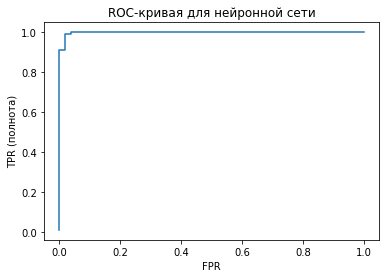

In [201]:
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, mlp.predict_proba(X_test_scaled)[:,1])

plt.plot(fpr_nn, tpr_nn)
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.title('ROC-кривая для нейронной сети')

# AUC
nn_auc = roc_auc_score(y_test,mlp.predict_proba(X_test_scaled)[:,1])
print("AUC для для нейронной сети = {:.3f}".format(nn_auc))

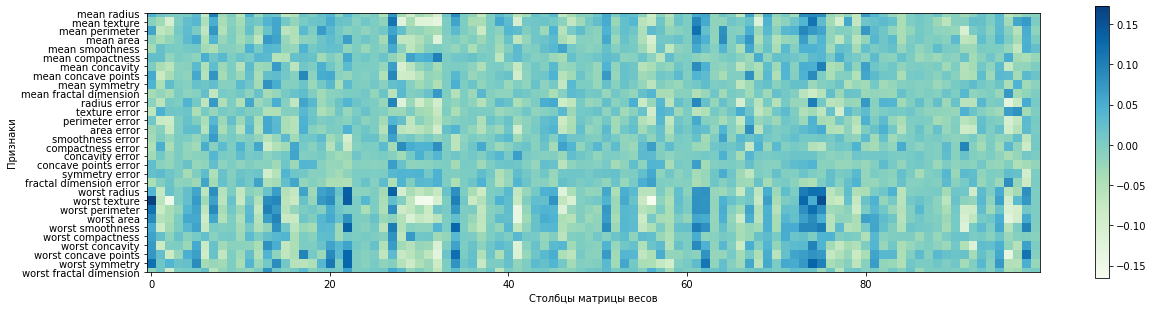

In [202]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Столбцы матрицы весов')
plt.ylabel('Признаки')
plt.colorbar()

# Метод опорных векторов

In [117]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = RAND)

svm = SVC()
svm.fit(X_train,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(svm.score(X_train,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(svm.score(X_test,y_test)))

Правильность на тренировочном наборе: 1.000
Правильность на тестовом наборе: 0.622


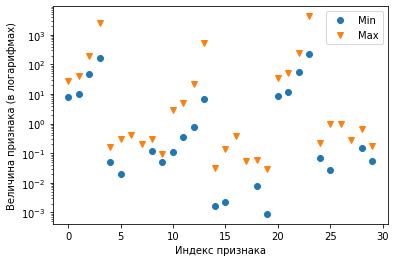

In [118]:
# сталкнулись с переобучением
# следует настроить гиперпараметры
# Метод опорных векторов как и Нейронные сети очень чувствителен к масштабированию данных


plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Индекс признака')
plt.ylabel('Величина признака (в логарифмах)')
plt.yscale('log')
plt.legend(loc ='upper right')

In [119]:
# попробуем отмасштабировать данные и сравнить результаты
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print('Минимальные значения признаков \n{}'.format(X_train_scaled.min(axis=0)))
print('Максимальные значения признаков\n{}'.format(X_train_scaled.max(axis=0)))

Минимальные значения признаков 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальные значения признаков
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [120]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

print ('Правильность на тренировочном наборе: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print ('Правильность на тестовом наборе: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

# тк алгоритм дает на тестовом наборе результат лучше, чем на тренировочном, то скорее всего модель недообучена
# модель имеет признаки недообучения, когда качество модели на обучающем и тестовом наборе весьма схоже, но все еще далеко от 
# 100%-ной правильности

Правильность на тренировочном наборе: 0.946
Правильность на тестовом наборе: 0.965


### Кросс - валидация

In [209]:
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)


In [210]:
# попробуем отмасштабировать данные и сравнить результаты
min_trainval = X_trainval.min(axis=0)
range_trainval = (X_trainval - min_trainval).max(axis=0)

X_trainval_scaled = (X_trainval - min_trainval)/range_trainval
X_test_scaled = (X_test - min_trainval)/range_trainval

print('Минимальные значения признаков \n{}'.format(X_trainval_scaled.min(axis=0)))
print('Максимальные значения признаков\n{}'.format(X_trainval_scaled.max(axis=0)))

Минимальные значения признаков 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Максимальные значения признаков
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [211]:
X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_trainval_scaled, y_trainval, random_state=RAND)

In [90]:
svm

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [212]:
# правильность при разном alpha с учетом разбиения данных на 3 части

C_2 = [0.01, 1, 1000] 
best_score = 0

for c in C_2:
    svm = SVC(C = c)
    svm.fit(X_train_scaled,y_train)
    svm.score(X_valid_scaled, y_valid)
    if score > best_score:
        best_score = score
        best_parameters = {'C': c}

In [213]:
best_parameters


{'C': 0.01}

In [214]:
# правильность при условии, что выбрали параметр из разделения данных на 3 части
svm = SVC(**best_parameters)
svm.fit(X_trainval_scaled,y_trainval)
test_score = svm.score(X_test_scaled,y_test)

print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))

Лучшее значение правильности на проверочном наборе: 0.981
Наилучшие значения параметров:  {'C': 0.01}
Правильность на тестовом наборе с наилучшими параметрами: 0.629


In [215]:
# правильность при перекрестной проверке

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

scores = []


for c in C:
    svm = SVC(C = c)
    scor = cross_val_score(svm,X_trainval_scaled, y_trainval, cv = kfold)
    scores.append(np.mean(scor))
    print('C = ', c)
    print("Правильность нейронной сети при перекрестной проверке {:.3f}\n".format(np.mean(scor)))    

C =  0.01
Правильность нейронной сети при перекрестной проверке 0.627

C =  1.0
Правильность нейронной сети при перекрестной проверке 0.946

C =  100
Правильность нейронной сети при перекрестной проверке 0.972



In [216]:
# правильность при условии, что выбрали параметр из перекрестной проверки
# scaler
X_trainval, X_test, y_trainval, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = RAND)

min_trainval = X_trainval.min(axis=0)
range_trainval = (X_trainval - min_trainval).max(axis=0)

X_trainval_scaled = (X_trainval - min_trainval)/range_trainval
X_test_scaled = (X_test - min_trainval)/range_trainval



X_train_scaled, X_valid_scaled, y_train, y_valid = train_test_split(X_trainval_scaled, y_trainval, random_state=RAND)

# model
svm = SVC(C = 100)
svm.fit(X_trainval_scaled,y_trainval)
test_score = svm.score(X_test_scaled,y_test)

print("Лучшее значение правильности на проверочном наборе: {:.3f}".format(best_score))
print("Наилучшие значения параметров C: ", svm.C)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.3f}".format(test_score))

Лучшее значение правильности на проверочном наборе: 0.981
Наилучшие значения параметров C:  100
Правильность на тестовом наборе с наилучшими параметрами: 0.986


### F1, precision, recall

In [219]:
pred_svm = svm.predict(X_test_scaled)

print('f1 мера = {:.2f}'.format(f1_score(y_test,pred_svm)))
print ('Точность = {:.2f}'.format(precision_score(y_test,pred_svm)))
print ('Полнота = {:.2f}\n'.format(recall_score(y_test,pred_svm)))

f1 мера = 0.99
Точность = 0.99
Полнота = 0.99



### ROC - AUC

AUC для метода опорных векторов = 0.997


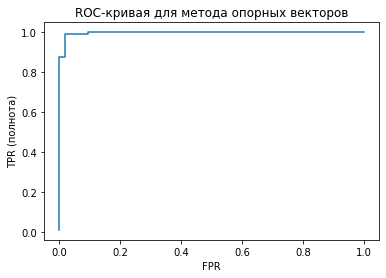

In [220]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm.decision_function(X_test_scaled))

plt.plot(fpr_svm, tpr_svm)
plt.xlabel('FPR')
plt.ylabel('TPR (полнота)')
plt.title('ROC-кривая для метода опорных векторов')

# AUC
svm_auc = roc_auc_score(y_test,svm.decision_function(X_test_scaled))
print("AUC для метода опорных векторов = {:.3f}".format(svm_auc))

# ROC для всех рассмотренных алгоритмов

Text(0.5, 1.0, 'ROC-кривая для алгоритмов машинного обучения на данных Breast Cancer')

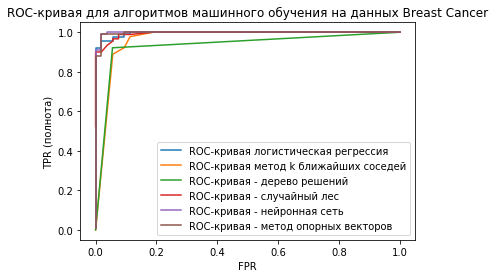

In [222]:
plt.plot(fpr, tpr, label="ROC-кривая логистическая регрессия")
plt.plot(fpr_knn, tpr_knn, label="ROC-кривая метод k ближайших соседей")
plt.plot(fpr_tree, tpr_tree,label= 'ROC-кривая - дерево решений')
plt.plot(fpr_rf, tpr_rf, label = 'ROC-кривая - случайный лес')
plt.plot(fpr_nn, tpr_nn, label = 'ROC-кривая - нейронная сеть')
plt.plot(fpr_svm, tpr_svm, label = 'ROC-кривая - метод опорных векторов')
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
plt.legend(loc=4)
plt.title('ROC-кривая для алгоритмов машинного обучения на данных Breast Cancer')